<a href="https://colab.research.google.com/github/jmParkGit/Colab/blob/main/Sparta_Basic-machineLearning/hw2_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Predictoin (Logistic regression)

## 데이터셋 다운로드
당뇨병 dataset: https://www.kaggle.com/kandij/diabetes-dataset

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'USER' # username
os.environ['KAGGLE_KEY'] = 'KEY' # key

In [2]:
!kaggle datasets download -d kandij/diabetes-dataset

diabetes-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
!unzip diabetes-dataset.zip

Archive:  diabetes-dataset.zip
replace diabetes2.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: diabetes2.csv           


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 데이터셋 로드

In [5]:
df = pd.read_csv('diabetes2.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 데이터셋 미리보기
### 당뇨병 클래스의 개수 확인
(0:정상, 1:당뇨병)

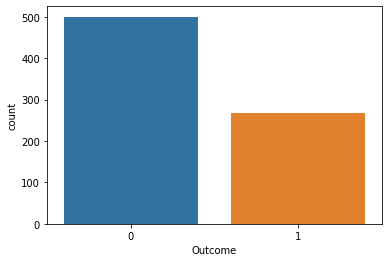

In [6]:
sns.countplot(x=df['Outcome'])

## 전처리(Preprocessing)
### 비어있는 행 확인
1. 비어있는값(null 또는 na)이 있는지 확인하고,
2. 비어있는 값을 포함한 행을 제거한다.

In [7]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [8]:
print(len(df))
df = df.dropna() #현재 dataset에는 필요없으나, 나중을 위해서 써둠
print(len(df))

768
768


## X,Y 데이터 분활

In [9]:
x_data = df.drop(columns=['Outcome'],axis=1)
x_data=x_data.astype(np.float32)

x_data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148.0,72.0,35.0,0.0,33.599998,0.627,50.0
1,1.0,85.0,66.0,29.0,0.0,26.600000,0.351,31.0
2,8.0,183.0,64.0,0.0,0.0,23.299999,0.672,32.0
3,1.0,89.0,66.0,23.0,94.0,28.100000,0.167,21.0
4,0.0,137.0,40.0,35.0,168.0,43.099998,2.288,33.0


In [10]:
y_data=df[['Outcome']]
y_data=y_data.astype(np.float32)
y_data.head(5)

,Outcome
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0


## 표준화(Standardization)
[StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
z=(x-u)/s
z=(x-평균)/표준편차


In [11]:
scaler=StandardScaler()
x_data_scaled=scaler.fit_transform(x_data)

print(x_data.values[0])
print(x_data_scaled[0])

[  6.    148.     72.     35.      0.     33.6     0.627  50.   ]
[ 0.6399473   0.8483238   0.14964075  0.90726995 -0.6928905   0.20401257
  0.46849188  1.4259955 ]


학습/검증 데이터 분활

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x_data_scaled,y_data,test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(614, 8) (154, 8)
(614, 1) (154, 1)


## 모델 학습

In [13]:
model = Sequential([
  Dense(1, activation='sigmoid')
  ])

model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

model.fit(
      x_train,
      y_train,
      validation_data=(x_val, y_val), # 검증 데이터를 넣어주면 한 epoch이 끝날때마다 자동으로 검증
      epochs=20
  )


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
20/20 [==============================] - 1s 12ms/step - loss: 1.0701 - acc: 0.3599 - val_loss: 0.9114 - val_acc: 0.4416
Epoch 2/20
20/20 [==============================] - 0s 3ms/step - loss: 0.8069 - acc: 0.4756 - val_loss: 0.6961 - val_acc: 0.6429
Epoch 3/20
20/20 [==============================] - 0s 4ms/step - loss: 0.6501 - acc: 0.6482 - val_loss: 0.5883 - val_acc: 0.7403
Epoch 4/20
20/20 [==============================] - 0s 4ms/step - loss: 0.5756 - acc: 0.7313 - val_loss: 0.5335 - val_acc: 0.7792
Epoch 5/20
20/20 [==============================] - 0s 3ms/step - loss: 0.5357 - acc: 0.7443 - val_loss: 0.5054 - val_acc: 0.7727
Epoch 6/20
20/20 [==============================] - 0s 3ms/step - loss: 0.5135 - acc: 0.7541 - val_loss: 0.4901 - val_acc: 0.7662
Epoch 7/20
20/20 [==============================] - 0s 3ms/step - loss: 0.4999 - acc: 0.7557 - val_loss: 0.4817 - val_acc: 0.7727
Epoch 8/20
20/20 [==============================] - 0s 3ms/step - loss: 0.4923 - acc: 0.7